<a href="https://colab.research.google.com/github/Shibu4064/Bio_Lab/blob/main/alternative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.5 MB/s eta 0:00:00


In [4]:
from Bio.Seq import Seq
seq=Seq('ATGCCCGCATTAAATTGC')
print(seq.count('A'),seq.count('T'),seq.count('G'),seq.count('C'))
GC=((seq.count('G')+seq.count('C'))/len(seq))*100
print("GC content=", GC)

5 5 3 5
GC content= 44.44444444444444


In [5]:
from Bio.SeqUtils import molecular_weight as mc
mc(seq)

5538.540499999999

In [7]:
from Bio import Entrez,SeqIO
Entrez.email="hrithikworks22@gmail.com"

In [10]:
handle=Entrez.einfo(db='pubmed')
result=Entrez.read(handle)
handle.close()
result

{'DbInfo': {'DbName': 'pubmed', 'MenuName': 'PubMed', 'Description': 'PubMed bibliographic record', 'DbBuild': 'Build-2023.10.04.01.26', 'Count': '36283863', 'LastUpdate': '2023/10/04 01:26', 'FieldList': [{'Name': 'ALL', 'FullName': 'All Fields', 'Description': 'All terms from all searchable fields', 'TermCount': '', 'IsDate': 'N', 'IsNumerical': 'N', 'SingleToken': 'N', 'Hierarchy': 'N', 'IsHidden': 'N'}, {'Name': 'UID', 'FullName': 'UID', 'Description': 'Unique number assigned to publication', 'TermCount': '', 'IsDate': 'N', 'IsNumerical': 'Y', 'SingleToken': 'Y', 'Hierarchy': 'N', 'IsHidden': 'Y'}, {'Name': 'FILT', 'FullName': 'Filter', 'Description': 'Limits the records', 'TermCount': '', 'IsDate': 'N', 'IsNumerical': 'N', 'SingleToken': 'Y', 'Hierarchy': 'N', 'IsHidden': 'N'}, {'Name': 'TITL', 'FullName': 'Title', 'Description': 'Words in title of publication', 'TermCount': '', 'IsDate': 'N', 'IsNumerical': 'N', 'SingleToken': 'N', 'Hierarchy': 'N', 'IsHidden': 'N'}, {'Name': 'ME

In [11]:
result['DbInfo'].keys()

dict_keys(['DbName', 'MenuName', 'Description', 'DbBuild', 'Count', 'LastUpdate', 'FieldList', 'LinkList'])

In [12]:
for field in result['DbInfo']['FieldList']:
  print('%(Name)s,%(FullName)s,%(Description)s' % field)

ALL,All Fields,All terms from all searchable fields
UID,UID,Unique number assigned to publication
FILT,Filter,Limits the records
TITL,Title,Words in title of publication
MESH,MeSH Terms,Medical Subject Headings assigned to publication
MAJR,MeSH Major Topic,MeSH terms of major importance to publication
JOUR,Journal,Journal abbreviation of publication
AFFL,Affiliation,Author's institutional affiliation and address
ECNO,EC/RN Number,EC number for enzyme or CAS registry number
SUBS,Supplementary Concept,CAS chemical name or MEDLINE Substance Name
PDAT,Date - Publication,Date of publication
EDAT,Date - Entry,Date publication first accessible through Entrez
VOL,Volume,Volume number of publication
PAGE,Pagination,Page number(s) of publication
PTYP,Publication Type,Type of publication (e.g., review)
LANG,Language,Language of publication
ISS,Issue,Issue number of publication
SUBH,MeSH Subheading,Additional specificity for MeSH term
SI,Secondary Source ID,Cross-reference from publication to othe

In [14]:
handle=Entrez.efetch(db='nucleotide',id='34577062',rettype='fasta',retmode='text')
print(handle.read())

>NM_001126.2 Homo sapiens adenylosuccinate synthase (ADSS), mRNA
GGAAGGGGCGTGGCCTCGGTCCGGGGTGGCGGCCGTTGCCGCCACCAGGGCCTCTTCCTGCGGGCGGTGC
TGCCGAGGCCGGCCTGCGCGGGGCAGTCATGGTACCCCCTTGAGCGGGCTGTGGCGGAGAGCGGGGCGGG
GACTGGCTGGAGGGTGGCGGCCCGGCGGGGCGGGGGCGGGGCCGGCCTCTGGCTCCTTCTTCCTCTGCAT
GTGGCTGGCGGCCGCAGAGCAGTTCAGTTCGCTCACTCCTCGCCGGCCGCCTCTCCTTCGGGCTCTCCTC
GCGTCACTGGAGCCATGGCGTTCGCCGAGACCTACCCGGCGGCATCCTCCCTGCCCAACGGCGATTGCGG
CCGCCCCAGGGCGCGGCCCGGAGGAAACCGGGTGACGGTGGTGCTCGGTGCGCAGTGGGGCGACGAAGGC
AAAGGGAAGGTGGTGGACCTGCTGGCGCAGGACGCCGACATCGTGTGCCGCTGCCAGGGAGGAAATAATG
CTGGCCATACAGTTGTTGTGGATTCTGTGGAATATGATTTTCATCTCTTACCCAGTGGAATAATTAATCC
AAATGTCACTGCATTCATTGGAAATGGTGTGGTAATTCATCTACCTGGATTGTTTGAAGAAGCAGAGAAA
AATGTTCAAAAAGGAAAAGGACTAGAAGGCTGGGAAAAAAGGCTTATTATATCTGACAGAGCTCATATTG
TATTTGATTTTCATCAAGCAGCTGATGGTATCCAGGAACAACAGAGACAAGAACAAGCAGGAAAAAATTT
GGGTACAACAAAAAAGGGCATTGGCCCAGTTTATTCGTCCAAAGCTGCTCGGAGTGGACTCAGGATGTGC
GACCTTGTTTCTGACTTTGATGGCTTCTCTGAGAGGTTTAAAGTTCTAGCTAACCAATACAAATCTATAT
ACCCCACTTTGG

In [16]:
handle=Entrez.efetch(db='nucleotide',id='NM_001126.2',rettype='fasta',retmode='text')
record=SeqIO.read(handle,'fasta')
print(f'''Sequence ID:{record.id}, Sequence Name:{record.name}, Sequence Length:{len(record)}, Sequence Description:{record.description}''')

Sequence ID:NM_001126.2, Sequence Name:NM_001126.2, Sequence Length:2775, Sequence Description:NM_001126.2 Homo sapiens adenylosuccinate synthase (ADSS), mRNA


In [17]:
SeqIO.write(record,'test.fasta','fasta')

1

In [18]:
record=SeqIO.read('test.fasta','fasta')
print(f'''Sequence ID:{record.id}, Sequence Name:{record.name}, Sequence Length:{len(record)}, Sequence Description:{record.description}''')

Sequence ID:NM_001126.2, Sequence Name:NM_001126.2, Sequence Length:2775, Sequence Description:NM_001126.2 Homo sapiens adenylosuccinate synthase (ADSS), mRNA


In [19]:
with Entrez.efetch(db='nucleotide',id='874509867',rettype='fasta',retmode='text') as handle:
  with open('test2.fasta','w') as f:
    f.write(handle.read())

In [21]:
record=SeqIO.read('test2.fasta','fasta')
print(f'''Sequence ID:{record.id}, Sequence Name:{record.name}, Sequence Length:{len(record)},
Sequence Description:{record.description}''')

Sequence ID:KP644081.1, Sequence Name:KP644081.1, Sequence Length:553, 
Sequence Description:KP644081.1 Cypripedium calceolus voucher SNP_13_0359 ribulose-1,5-bisphosphate carboxylase/oxygenase large subunit (rbcL) gene, partial cds; chloroplast


In [22]:
from Bio import Entrez, SeqIO
Entrez.email="hrithikworks22@gmail.com"
handle=Entrez.efetch(db='nucleotide',id='MN908947.3',rettype='gb',retmode='text')
recs=list(SeqIO.parse(handle,'gb'))
handle.close()
recs

[SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947', description='Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])]

In [23]:
covid_dna=recs[0].seq
covid_dna,len(covid_dna)

(Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), 29903)

In [25]:
ATGC={'A':covid_dna.count('A'),'T':covid_dna.count('T'),'G':covid_dna.count('G'),'C':covid_dna.count('C')}
ATGC

{'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492}

Text(0.5, 1.0, 'Nucleotide Frequency')

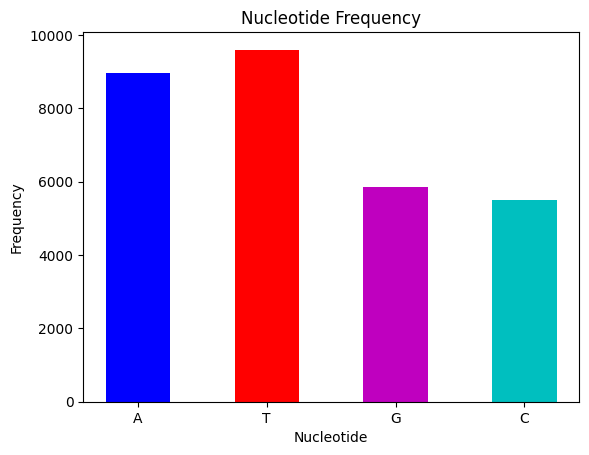

In [26]:
import matplotlib.pyplot as plt
width=0.5
plt.bar(ATGC.keys(),ATGC.values(),width,color=['b','r','m','c'])
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Frequency')